In [1]:
from __future__ import print_function

import pylab as pl
import numpy as np
from scipy.optimize import curve_fit, minimize
import scipy.stats as stats
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['chisq', 'normal', 'pois', 'binomial', 'logistic']

In [3]:
mymean = 10

In [4]:
mysize = (np.linspace(10, 2000, 100)).astype(int)
print (mysize, mysize.shape)

[  10   30   50   70   90  110  130  150  170  190  211  231  251  271  291
  311  331  351  371  391  412  432  452  472  492  512  532  552  572  592
  613  633  653  673  693  713  733  753  773  793  814  834  854  874  894
  914  934  954  974  994 1015 1035 1055 1075 1095 1115 1135 1155 1175 1195
 1216 1236 1256 1276 1296 1316 1336 1356 1376 1396 1417 1437 1457 1477 1497
 1517 1537 1557 1577 1597 1618 1638 1658 1678 1698 1718 1738 1758 1778 1798
 1819 1839 1859 1879 1899 1919 1939 1959 1979 2000] (100,)


## Chisquared Distribution

In [5]:
df = mymean

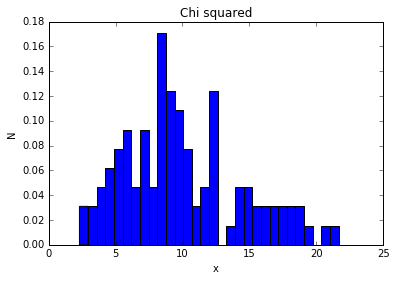

In [6]:
md = {}
md['chisq'] = np.random.chisquare(df, size=100)

pl.hist(md['chisq'], bins = 30, normed = True)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi squared')

In [7]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 9.96, standard deviation: 4.43


In [8]:
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

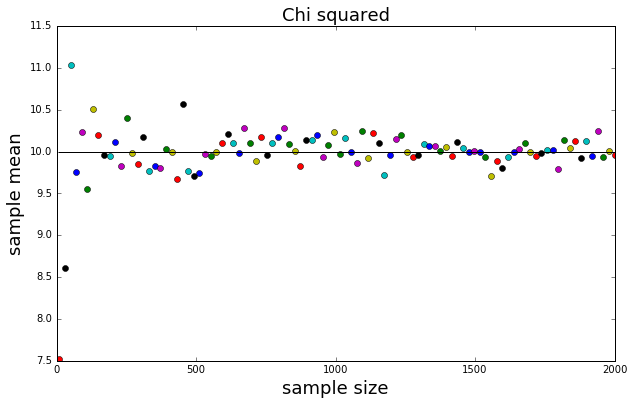

In [9]:
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

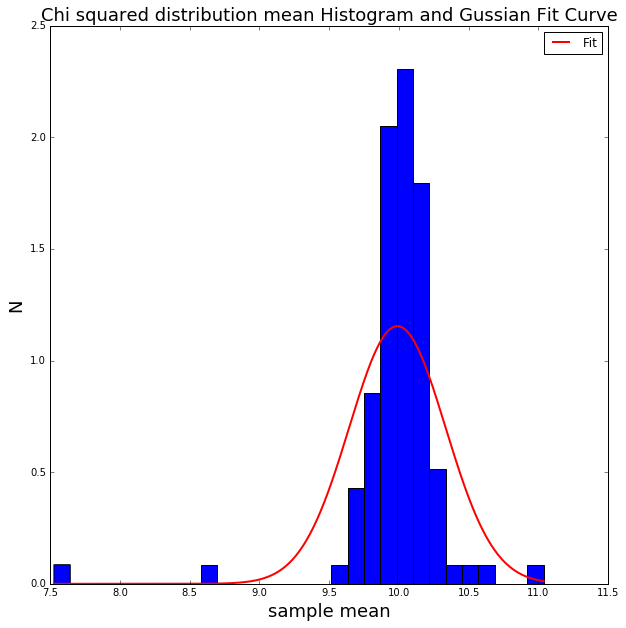

In [10]:
allmeans = np.array(sorted(list(md['chisq']['means'].values())))

xspace = np.linspace(allmeans.min(),allmeans.max(),1000)
fit = stats.norm.pdf(xspace, np.mean(allmeans), np.std(allmeans))

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30, normed = True)
pl.plot(xspace, fit, "r", lw = 2, label = 'Fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend()
pl.title('Chi squared distribution mean Histogram and Gussian Fit Curve', fontsize = 18)

## Normal Distribution

In [11]:
md['normal'] = {}
for n in mysize:
    md['normal'][n] = np.random.normal(mymean, size = n)

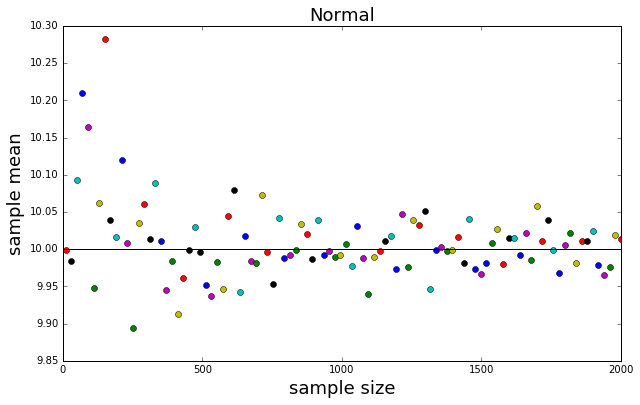

In [12]:
md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

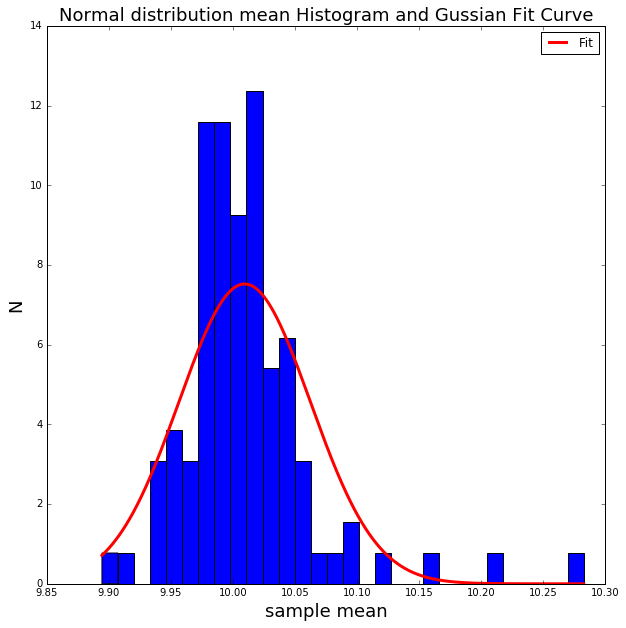

In [13]:
allmeans = np.array(sorted(list(md['normal']['means'].values())))

xspace = np.linspace(allmeans.min(),allmeans.max(),1000)
fit = stats.norm.pdf(xspace, np.mean(allmeans), np.std(allmeans))

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, normed = True)
pl.plot(xspace, fit, "r", lw = 3, label = 'Fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend()
pl.title('Normal distribution mean Histogram and Gussian Fit Curve', fontsize = 18)

## Poisson Distribution

In [14]:
md['poisson'] = {}
for n in mysize:
    md['poisson'][n] = np.random.poisson(mymean, size = n)

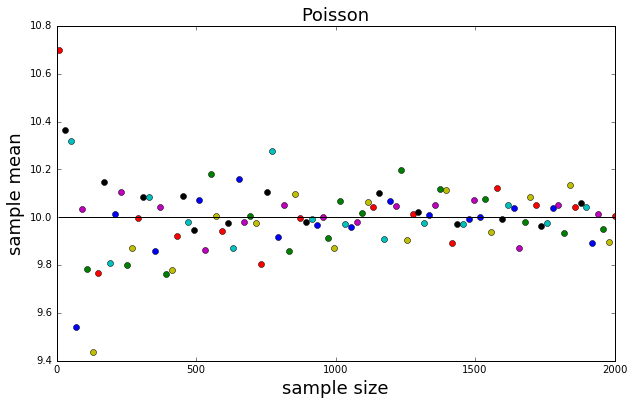

In [15]:
md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

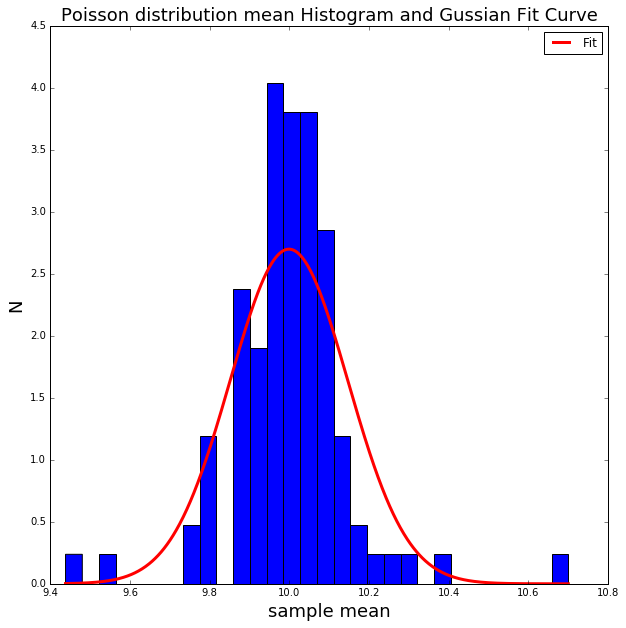

In [16]:
allmeans = np.array(sorted(list(md['poisson']['means'].values())))

xspace = np.linspace(allmeans.min(),allmeans.max(),1000)
fit = stats.norm.pdf(xspace, np.mean(allmeans), np.std(allmeans))

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, normed = True)
pl.plot(xspace, fit, "r", lw = 3, label = 'Fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend()
pl.title('Poisson distribution mean Histogram and Gussian Fit Curve', fontsize = 18)

## Binomial Distribution

In [17]:
md['binomial'] = {}
for n in mysize:
    p = np.random.random()
    md['binomial'][n] = np.random.binomial(mymean / p, p, size = n)

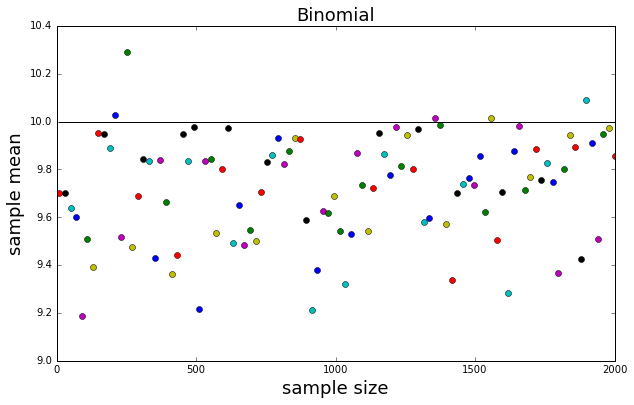

In [18]:
md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

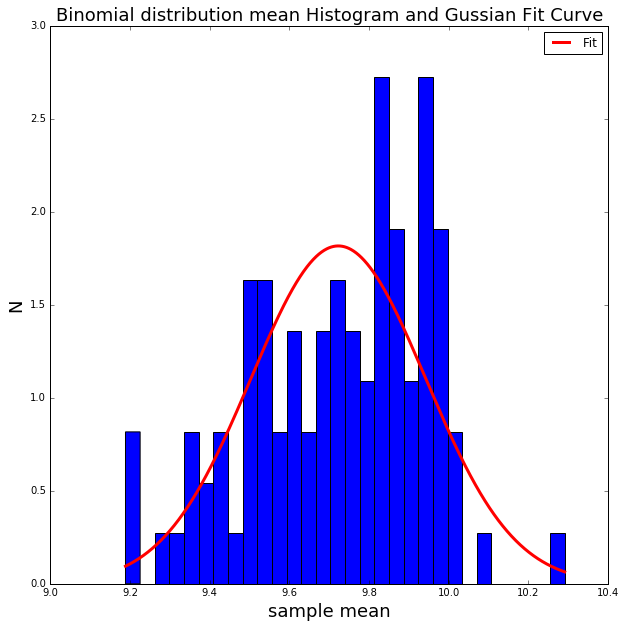

In [19]:
allmeans = np.array(sorted(list(md['binomial']['means'].values())))

xspace = np.linspace(allmeans.min(),allmeans.max(),1000)
fit = stats.norm.pdf(xspace, np.mean(allmeans), np.std(allmeans))

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, normed = True)
pl.plot(xspace, fit, "r", lw = 3, label = 'Fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend()
pl.title('Binomial distribution mean Histogram and Gussian Fit Curve', fontsize = 18)

## Logistic Distribution

In [20]:
md['logistic'] = {}
for n in mysize:
    md['logistic'][n] = np.random.logistic(mymean, size = n)

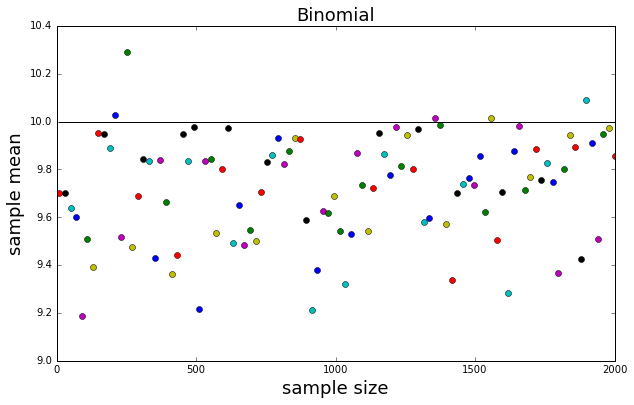

In [21]:
md['logistic']['means'] = {}
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['logistic']:
    if not type(nn) == str:
        md['logistic']['means'][nn] = md['logistic'][nn].mean()
        #and plot it
        axlogistic_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Binomial', fontsize=18)
        axlogistic_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

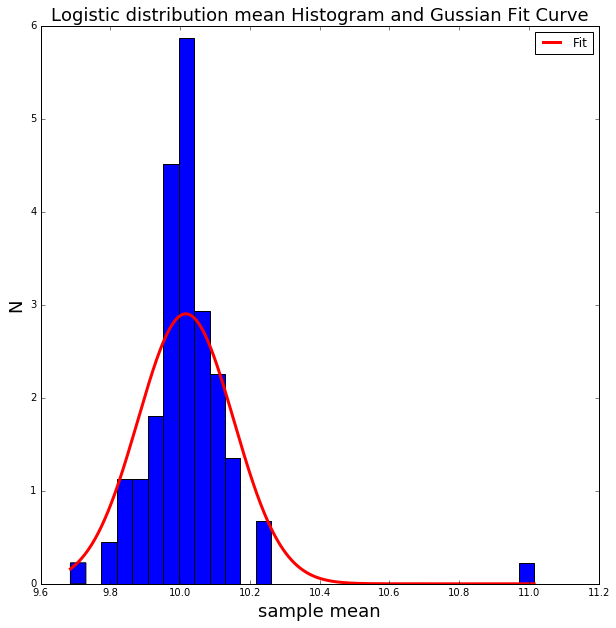

In [22]:
allmeans = np.array(sorted(list(md['logistic']['means'].values())))

xspace = np.linspace(allmeans.min(),allmeans.max(),1000)
fit = stats.norm.pdf(xspace, np.mean(allmeans), np.std(allmeans))

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, normed = True)
pl.plot(xspace, fit, "r", lw = 3, label = 'Fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend()
pl.title('Logistic distribution mean Histogram and Gussian Fit Curve', fontsize = 18)

### Describe the behavior you see in the plots in terms of the law of large numbers.

As Sample Size increases, Sample Mean approaches their theoretical mean.

This reflects the law of large numbers.